# Demographic Disparities in Arrests in NYC

### Importing Libraries and Dataset.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest


file_path = 'NYPD_Arrests_Data_2018-2019.csv'
data = pd.read_csv(file_path)

data.head()



,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,...,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,173151555,01/01/2018,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1201001,F,K,66,...,986735,167242,40.625725,-73.991049,POINT (-73.99104937999994 40.62572501600005),17621.0,2.0,2.0,18.0,39.0
1,173148126,01/01/2018,531.0,"DRUG PARAPHERNALIA, POSSESSES OR SELLS 1",117.0,DANGEROUS DRUGS,PL 2205500,F,M,17,...,992029,213332,40.752228,-73.971925,POINT (-73.97192485799998 40.752228400000035),12079.0,71.0,4.0,51.0,9.0
2,173142262,01/01/2018,113.0,"MENACING,UNCLASSIFIED",344.0,ASSAULT 3 & RELATED OFFENSES,PL 1201401,M,S,121,...,939367,169549,40.631944,-74.161705,POINT (-74.16170488099993 40.63194388100004),10371.0,4.0,1.0,13.0,75.0
3,173142129,01/01/2018,904.0,"INTOXICATED DRIVING,ALCOHOL",119.0,INTOXICATED/IMPAIRED DRIVING,VTL11920D3,F,B,40,...,1006777,236405,40.815532,-73.918618,POINT (-73.91861784599996 40.81553235500007),10933.0,49.0,5.0,43.0,23.0
4,173142152,01/01/2018,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,46,...,1008861,247665,40.846432,-73.911048,POINT (-73.91104764699998 40.84643225400004),10931.0,6.0,5.0,29.0,29.0


### Data Cleaning

In [20]:
data.count()

ARREST_KEY                461390
ARREST_DATE               461390
PD_CD                     461280
PD_DESC                   460306
KY_CD                     460306
OFNS_DESC                 460306
LAW_CODE                  461345
LAW_CAT_CD                458326
ARREST_BORO               461390
ARREST_PRECINCT           461390
JURISDICTION_CODE         461390
AGE_GROUP                 461390
PERP_SEX                  461390
PERP_RACE                 461390
X_COORD_CD                461390
Y_COORD_CD                461390
Latitude                  461390
Longitude                 461390
Lon_Lat                   461390
Zip Codes                 460214
Community Districts       461304
Borough Boundaries        461304
City Council Districts    461304
Police Precincts          461304
dtype: int64

In [21]:
# Step 1: Check for Missing Values
missing_values = data.isnull().sum()

# Step 2: Validate Data Types
data_types = data.dtypes

missing_values



ARREST_KEY                   0
ARREST_DATE                  0
PD_CD                      110
PD_DESC                   1084
KY_CD                     1084
OFNS_DESC                 1084
LAW_CODE                    45
LAW_CAT_CD                3064
ARREST_BORO                  0
ARREST_PRECINCT              0
JURISDICTION_CODE            0
AGE_GROUP                    0
PERP_SEX                     0
PERP_RACE                    0
X_COORD_CD                   0
Y_COORD_CD                   0
Latitude                     0
Longitude                    0
Lon_Lat                      0
Zip Codes                 1176
Community Districts         86
Borough Boundaries          86
City Council Districts      86
Police Precincts            86
dtype: int64

In [22]:
data_types

ARREST_KEY                  int64
ARREST_DATE                object
PD_CD                     float64
PD_DESC                    object
KY_CD                     float64
OFNS_DESC                  object
LAW_CODE                   object
LAW_CAT_CD                 object
ARREST_BORO                object
ARREST_PRECINCT             int64
JURISDICTION_CODE           int64
AGE_GROUP                  object
PERP_SEX                   object
PERP_RACE                  object
X_COORD_CD                  int64
Y_COORD_CD                  int64
Latitude                  float64
Longitude                 float64
Lon_Lat                    object
Zip Codes                 float64
Community Districts       float64
Borough Boundaries        float64
City Council Districts    float64
Police Precincts          float64
dtype: object

In [23]:
# Handling missing values and converting data types

# Convert ARREST_DATE to datetime format
data['ARREST_DATE'] = pd.to_datetime(data['ARREST_DATE'])


data = data.dropna()

data.isnull().sum()



ARREST_KEY                0
ARREST_DATE               0
PD_CD                     0
PD_DESC                   0
KY_CD                     0
OFNS_DESC                 0
LAW_CODE                  0
LAW_CAT_CD                0
ARREST_BORO               0
ARREST_PRECINCT           0
JURISDICTION_CODE         0
AGE_GROUP                 0
PERP_SEX                  0
PERP_RACE                 0
X_COORD_CD                0
Y_COORD_CD                0
Latitude                  0
Longitude                 0
Lon_Lat                   0
Zip Codes                 0
Community Districts       0
Borough Boundaries        0
City Council Districts    0
Police Precincts          0
dtype: int64

In [24]:
data.dtypes

ARREST_KEY                         int64
ARREST_DATE               datetime64[ns]
PD_CD                            float64
PD_DESC                           object
KY_CD                            float64
OFNS_DESC                         object
LAW_CODE                          object
LAW_CAT_CD                        object
ARREST_BORO                       object
ARREST_PRECINCT                    int64
JURISDICTION_CODE                  int64
AGE_GROUP                         object
PERP_SEX                          object
PERP_RACE                         object
X_COORD_CD                         int64
Y_COORD_CD                         int64
Latitude                         float64
Longitude                        float64
Lon_Lat                           object
Zip Codes                        float64
Community Districts              float64
Borough Boundaries               float64
City Council Districts           float64
Police Precincts                 float64
dtype: object

### Data Visualizations

In [25]:
sns.set_style("whitegrid")
# Demographic Distribution of Arrests: By age, sex, and race
# Age Group Distribution
age_group_distribution = data['AGE_GROUP'].value_counts(normalize=True) * 100
# Sex Distribution
sex_distribution = data['PERP_SEX'].value_counts(normalize=True) * 100
# Race Distribution
race_distribution = data['PERP_RACE'].value_counts(normalize=True) * 100



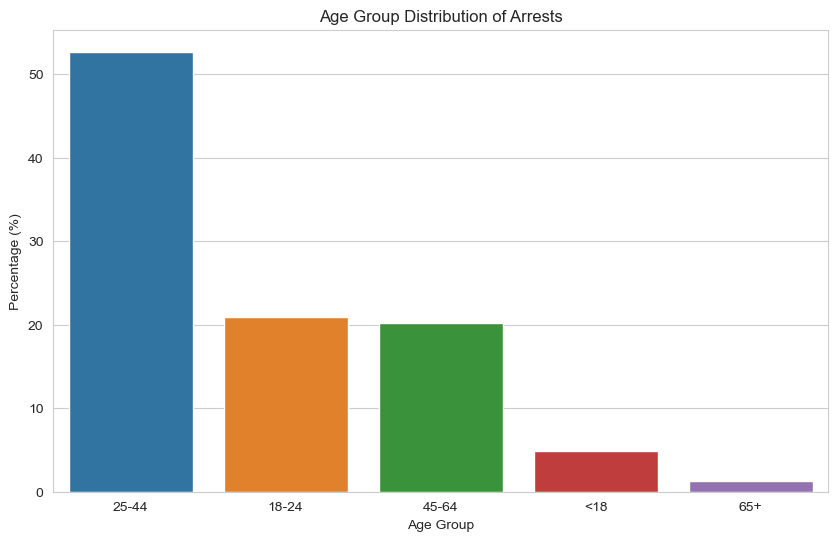

AGE_GROUP
25-44    52.689636
18-24    20.919173
45-64    20.238377
<18       4.846695
65+       1.306119
Name: proportion, dtype: float64

In [26]:
# Age Group Distribution Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_distribution.index, y=age_group_distribution.values)
plt.title('Age Group Distribution of Arrests')
plt.ylabel('Percentage (%)')
plt.xlabel('Age Group')
plt.show()
# Displaying the calculated distributions
age_group_distribution

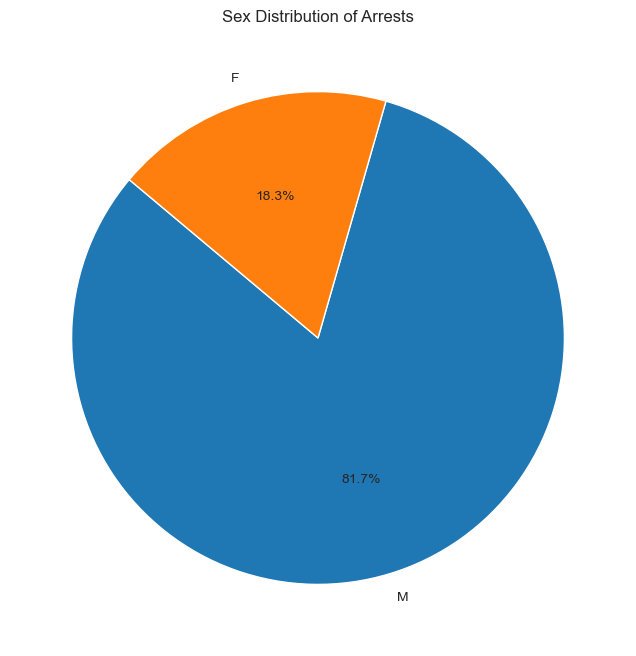

PERP_SEX
M    81.664781
F    18.335219
Name: proportion, dtype: float64

In [27]:
# Sex Distribution Plot
plt.figure(figsize=(8, 8))
plt.pie(sex_distribution, labels=sex_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Sex Distribution of Arrests')
plt.show()
sex_distribution

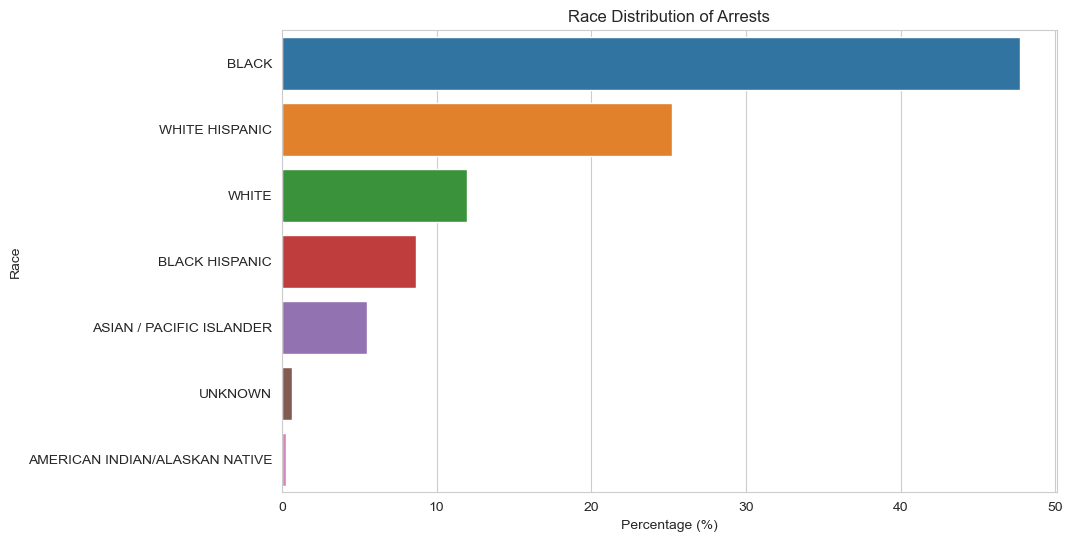

PERP_RACE
BLACK                             47.703055
WHITE HISPANIC                    25.210707
WHITE                             11.948457
BLACK HISPANIC                     8.676472
ASIAN / PACIFIC ISLANDER           5.498987
UNKNOWN                            0.677945
AMERICAN INDIAN/ALASKAN NATIVE     0.284377
Name: proportion, dtype: float64

In [28]:
# Race Distribution Plot
plt.figure(figsize=(10, 6))
sns.barplot(y=race_distribution.index, x=race_distribution.values)
plt.title('Race Distribution of Arrests')
plt.xlabel('Percentage (%)')
plt.ylabel('Race')
plt.show()
race_distribution

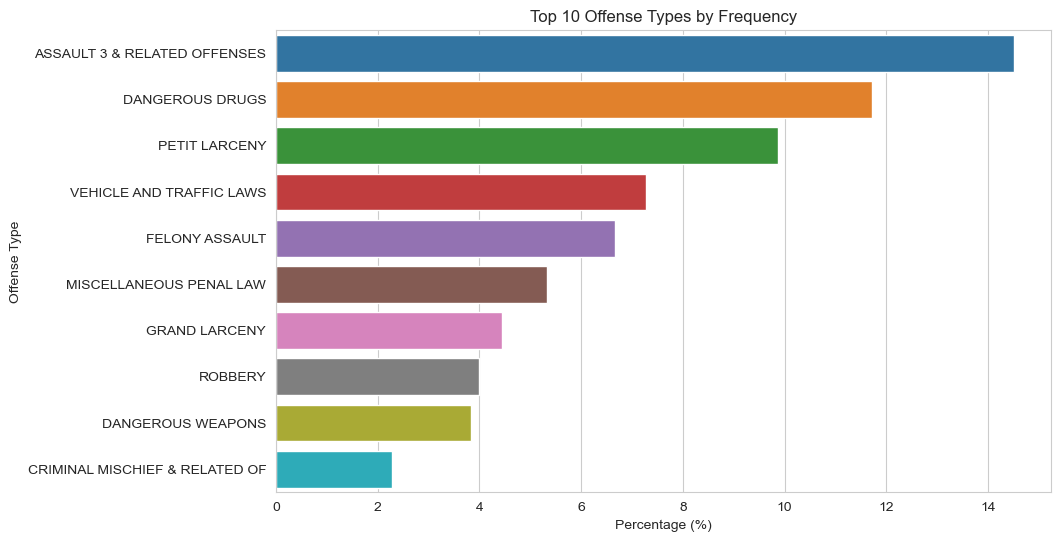

OFNS_DESC
ASSAULT 3 & RELATED OFFENSES      14.508073
DANGEROUS DRUGS                   11.719113
PETIT LARCENY                      9.867700
VEHICLE AND TRAFFIC LAWS           7.281115
FELONY ASSAULT                     6.657326
MISCELLANEOUS PENAL LAW            5.337833
GRAND LARCENY                      4.449619
ROBBERY                            3.999702
DANGEROUS WEAPONS                  3.838986
CRIMINAL MISCHIEF & RELATED OF     2.272388
Name: proportion, dtype: float64

In [29]:
# 2. Offense Type Frequency: Exploring the most common types of offenses

# Calculating the frequency of each offense type
offense_frequency = data['OFNS_DESC'].value_counts(normalize=True).head(10) * 100  # Top 10 offenses

# Plotting the offense frequency
plt.figure(figsize=(10, 6))
sns.barplot(x=offense_frequency.values, y=offense_frequency.index)
plt.title('Top 10 Offense Types by Frequency')
plt.xlabel('Percentage (%)')
plt.ylabel('Offense Type')
plt.show()

offense_frequency


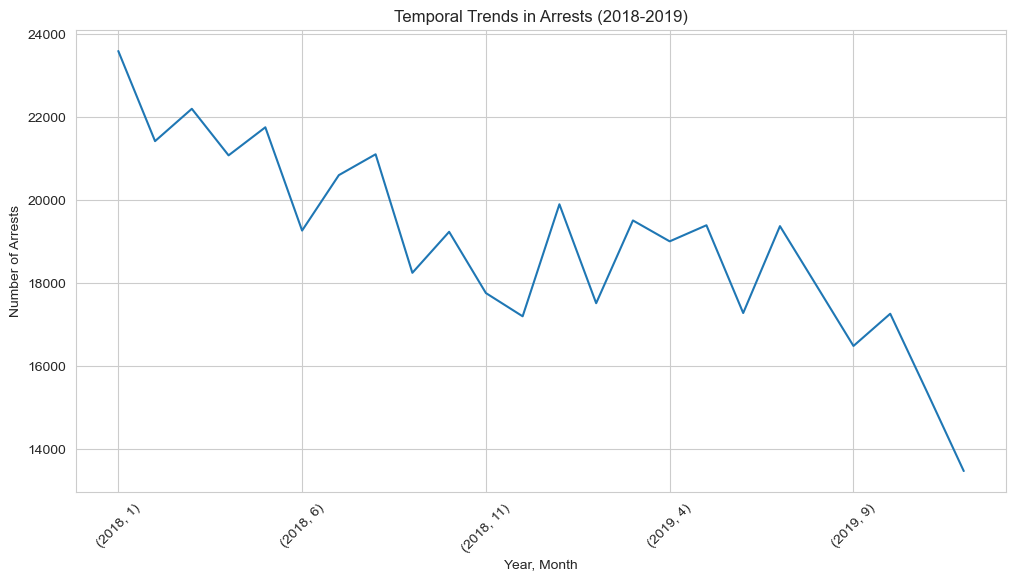

Year,2018,2019
Month,,
1,23601,19905
2,21428,17519
3,22208,19515
4,21085,19011
5,21762,19399
6,19271,17282
7,20608,19378
8,21111,17936
9,18252,16488


In [30]:
# 3. Temporal Trends in Arrests: Observing changes or patterns over the two years

# Extracting year and month for temporal analysis
data['Year'] = data['ARREST_DATE'].dt.year
data['Month'] = data['ARREST_DATE'].dt.month

# Grouping data by year and month
temporal_trends = data.groupby(['Year', 'Month']).size()

# Plotting the temporal trends
plt.figure(figsize=(12, 6))
temporal_trends.plot(kind='line')
plt.title('Temporal Trends in Arrests (2018-2019)')
plt.xlabel('Year, Month')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45)
plt.show()

temporal_trends.unstack(level=0)  

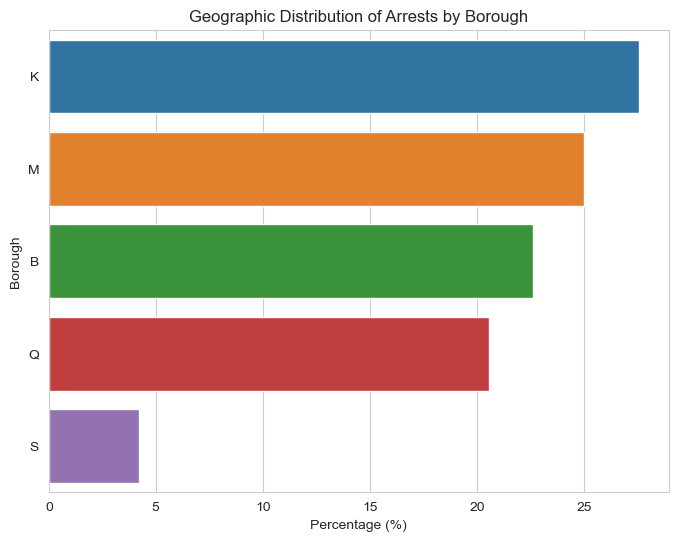

ARREST_BORO
K    27.589216
M    24.999342
B    22.610747
Q    20.564852
S     4.235843
Name: proportion, dtype: float64

In [31]:
# 4. Geographic Distribution of Arrests: Examining arrest concentration in NYC

# Grouping data by Borough
borough_arrests = data['ARREST_BORO'].value_counts(normalize=True) * 100

# Plotting the geographic distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=borough_arrests.values, y=borough_arrests.index)
plt.title('Geographic Distribution of Arrests by Borough')
plt.xlabel('Percentage (%)')
plt.ylabel('Borough')
plt.show()

borough_arrests


### Hypothesis Test 1: Racial Disparity in Drug-Related Offenses

In [32]:
# Filtering the data for drug-related offenses
drug_related_data = data[data['OFNS_DESC'].str.contains("DRUG", na=False)]


# Extracting count and nobs for Black and White individuals
count_drug_race = drug_related_data[drug_related_data['PERP_RACE'].isin(['BLACK', 'WHITE'])]['PERP_RACE'].value_counts()
nobs_drug_race = data[data['PERP_RACE'].isin(['BLACK', 'WHITE'])]['PERP_RACE'].value_counts()

# Z-test for comparing proportions
stat, pval_race = proportions_ztest(count_drug_race, nobs_drug_race)

stat, pval_race



(-8.269742550397824, 1.3424859157661005e-16)

### Hypothesis 2: Higher rate of drug-related arrests among males compared to females

In [33]:
# Filtering data for drug-related offenses
drug_related = data[data['OFNS_DESC'].str.contains("DRUG", na=False)]

count_male = drug_related[drug_related['PERP_SEX'] == 'M'].shape[0]
count_female = drug_related[drug_related['PERP_SEX'] == 'F'].shape[0]
nobs_male = data[data['PERP_SEX'] == 'M'].shape[0]
nobs_female = data[data['PERP_SEX'] == 'F'].shape[0]

# Performing Z-test for comparing proportions (one-tailed)
stat2, pval2 = proportions_ztest([count_male, count_female], [nobs_male, nobs_female], alternative='larger')

stat2, pval2

(34.5544026303301, 6.120320852531483e-262)

### Hypothesis 3 - Age Group Differences in Drug Related Arrests.

In [34]:
# Counts for drug-related arrests in each age group
drug_counts = drug_related['AGE_GROUP'].value_counts()

# Total counts of arrests in each age group
total_counts = data['AGE_GROUP'].value_counts()

# Calculate the proportions for the "45-64" and "<18" age groups
proportion_45_64 = drug_counts['45-64'] / total_counts['45-64']
proportion_under_18 = drug_counts['<18'] / total_counts['<18']

# Now perform the one-tailed Z-test
from statsmodels.stats.proportion import proportions_ztest

count = np.array([drug_counts['45-64'], drug_counts['<18']])
nobs = np.array([total_counts['45-64'], total_counts['<18']])

stat, pval = proportions_ztest(count, nobs, alternative='larger')

stat, pval



(37.415382305281184, 1.0984371824234185e-306)